In [5]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    start_u = start.value // 10**9
    end_u = end.value // 10**9
    return pd.to_datetime([random.randint(start_u, end_u) for _ in range(n)], unit='s')

# Increasing the sample data size for more robust analysis
num_entries = 1000  # Increasing the number of entries to 1000

# Re-generating random data with increased number of entries
data = {
    "Property_ID": [f"P{str(i).zfill(3)}" for i in range(1, num_entries + 1)],
    "Location": random.choices(["Downtown", "Suburban", "Rural"], k=num_entries),
    "Property_Type": random.choices(["Apartment", "Condo", "Townhouse", "Single Family Home"], k=num_entries),
    "Number_of_Bedrooms": [random.choice([1, 2, 3, 4, 5]) for _ in range(num_entries)],
    "Monthly_Rent": [random.randint(800, 5000) for _ in range(num_entries)],
    "Lease_Start_Date": random_dates(pd.to_datetime(start_date), pd.to_datetime(end_date), num_entries),
    "Lease_End_Date": random_dates(pd.to_datetime(start_date), pd.to_datetime(end_date), num_entries),
    "Tenant_Age": [random.randint(18, 70) for _ in range(num_entries)],
    "Tenant_Income": [random.randint(30000, 200000) for _ in range(num_entries)],
    "Tenant_Employment_Status": random.choices(["Employed", "Self-Employed", "Unemployed", "Student"], k=num_entries),
    "Previous_Vacancy_Duration": [random.randint(0, 365) for _ in range(num_entries)]  # Duration in days
}

# Re-creating the DataFrame with increased data
sample_data = pd.DataFrame(data)

# Ensuring Lease End Date is after Lease Start Date
sample_data['Lease_End_Date'] = sample_data.apply(lambda row: row['Lease_Start_Date'] + timedelta(days=random.randint(30, 365)), axis=1)

sample_data.head()  # Displaying first few rows of the larger sample data


,Property_ID,Location,Property_Type,Number_of_Bedrooms,Monthly_Rent,Lease_Start_Date,Lease_End_Date,Tenant_Age,Tenant_Income,Tenant_Employment_Status,Previous_Vacancy_Duration
0,P001,Rural,Apartment,1,4464,2023-03-28 14:01:03,2023-09-04 14:01:03,20,176747,Self-Employed,16
1,P002,Suburban,Condo,3,1921,2020-07-25 08:07:06,2020-08-29 08:07:06,35,71340,Unemployed,363
2,P003,Downtown,Condo,4,3611,2023-08-10 07:42:40,2024-06-30 07:42:40,55,35536,Employed,114
3,P004,Downtown,Condo,1,3481,2022-06-10 04:19:25,2022-10-09 04:19:25,22,101597,Employed,75
4,P005,Downtown,Townhouse,1,1828,2020-11-01 01:20:12,2021-09-11 01:20:12,39,162963,Self-Employed,204


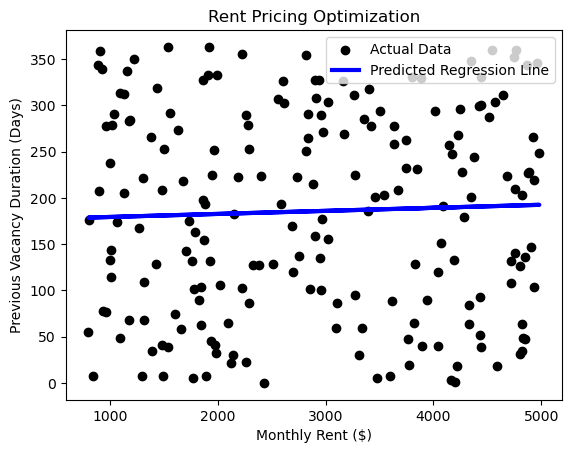

11798.761043401444

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Converting the 'Monthly_Rent' and 'Previous_Vacancy_Duration' columns to numpy arrays
X = sample_data['Monthly_Rent'].values.reshape(-1, 1)
y = sample_data['Previous_Vacancy_Duration'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Plotting the results
plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted Regression Line')
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Previous Vacancy Duration (Days)')
plt.title('Rent Pricing Optimization')
plt.legend()
plt.show()

mse



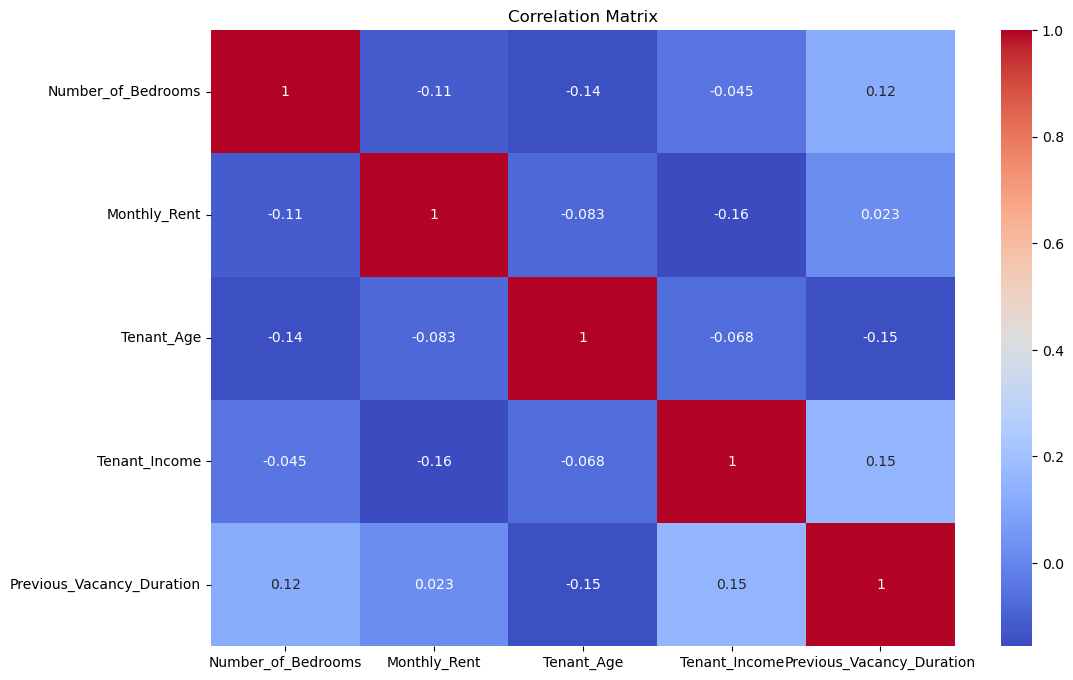

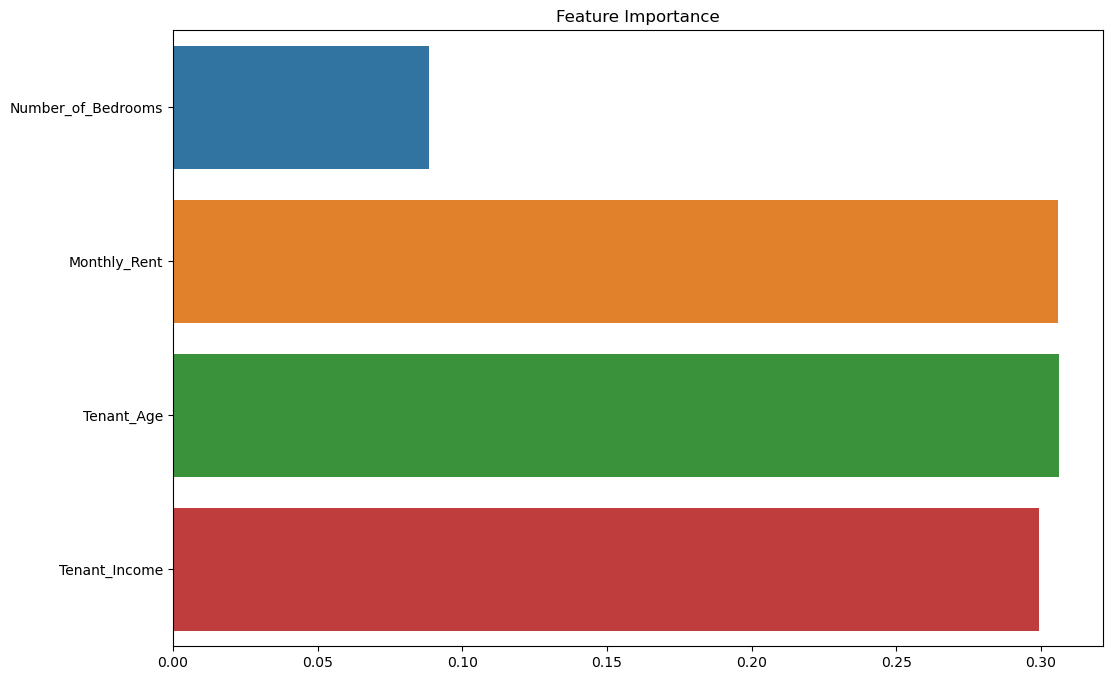

[('Tenant_Age', 0.30622543138390335),
 ('Monthly_Rent', 0.3059676221181814),
 ('Tenant_Income', 0.29936431412742515),
 ('Number_of_Bedrooms', 0.08844263237049013)]

In [7]:
# Selecting only numeric columns for correlation matrix
numeric_cols = sample_data_processed.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

# For the Random Forest model, we exclude non-numeric columns and dates
X_rf = numeric_cols.drop(['Previous_Vacancy_Duration'], axis=1)
y_rf = sample_data_processed['Previous_Vacancy_Duration']

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_rf, y_rf)
feature_importance = rf.feature_importances_

# Updating the feature names for the feature importance plot
feature_names_rf = X_rf.columns

# Plotting the results
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Feature Importance Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_names_rf)
plt.title("Feature Importance")
plt.show()

# Returning the top 5 features based on importance
top_features = sorted(zip(feature_names_rf, feature_importance), key=lambda x: x[1], reverse=True)[:5]
top_features


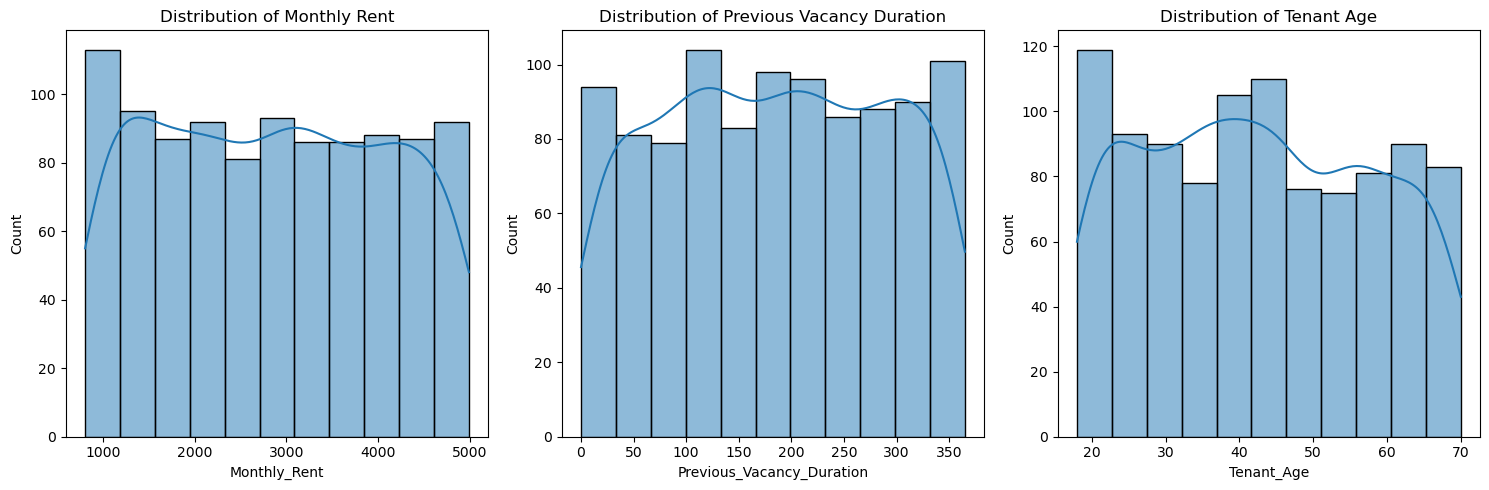

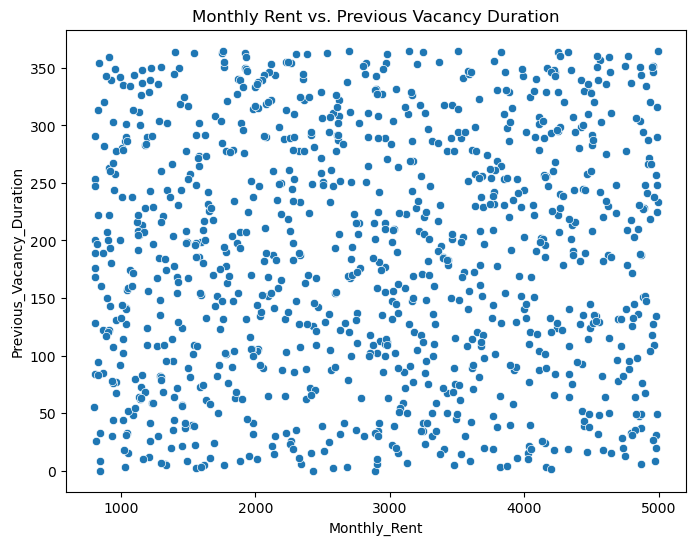

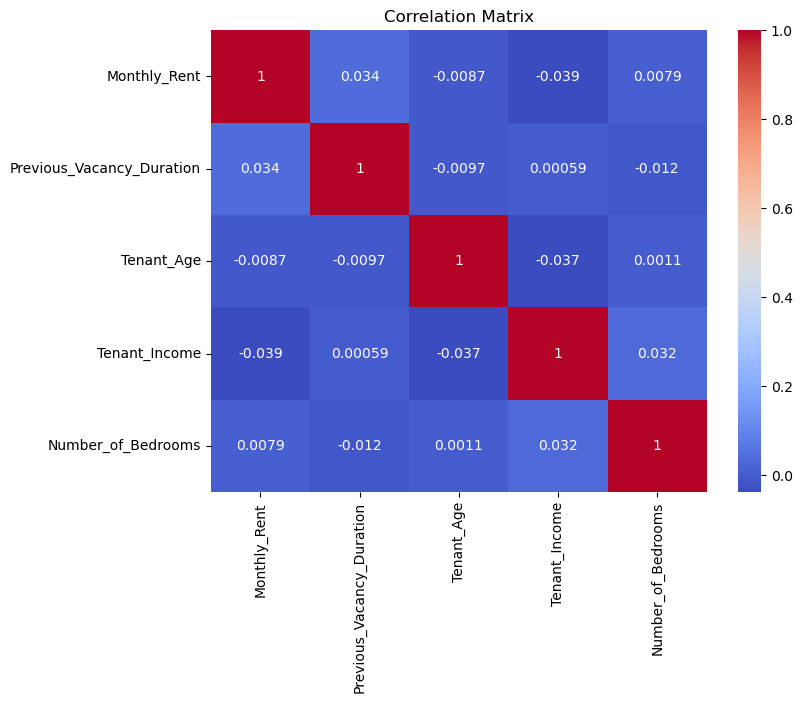

In [8]:
# Exploratory Data Analysis (EDA)

# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the distribution of key variables
plt.figure(figsize=(15, 5))

# Distribution of Monthly Rent
plt.subplot(1, 3, 1)
sns.histplot(sample_data['Monthly_Rent'], kde=True)
plt.title('Distribution of Monthly Rent')

# Distribution of Previous Vacancy Duration
plt.subplot(1, 3, 2)
sns.histplot(sample_data['Previous_Vacancy_Duration'], kde=True)
plt.title('Distribution of Previous Vacancy Duration')

# Distribution of Tenant Age
plt.subplot(1, 3, 3)
sns.histplot(sample_data['Tenant_Age'], kde=True)
plt.title('Distribution of Tenant Age')

plt.tight_layout()
plt.show()

# Analyzing the relationship between Monthly Rent and Previous Vacancy Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sample_data, x='Monthly_Rent', y='Previous_Vacancy_Duration')
plt.title('Monthly Rent vs. Previous Vacancy Duration')
plt.show()

# Correlation Matrix
correlation_matrix = sample_data[['Monthly_Rent', 'Previous_Vacancy_Duration', 'Tenant_Age', 'Tenant_Income', 'Number_of_Bedrooms']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
